In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
from pathlib import Path
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# merge 12 months of sales data into a csv file

base_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/refs/heads/master/SalesAnalysis/Sales_Data'

# for each month in the list you are inserting it into the the string. Base_url/sales_month_2019.csv
# for each month in months (so 12 month) create the string

urls = [f"{base_url}/Sales_{month}_2019.csv" for month in months]

# here we can say create a new variable dfs and append using pd.read_csv(url) for each url in urls
# this will put each url in the brackets

dfs = [pd.read_csv(url) for url in urls]

# concating the datasets

combined_df = pd.concat(dfs, ignore_index=True)

In [ ]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
combined_df.shape

(186850, 6)

In [ ]:
combined_df.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,object
Purchase Address,object


In [ ]:
unique_products = combined_df['Product'].unique()
unique_quant_ordered = combined_df['Quantity Ordered'].unique()
unique_order_date = combined_df['Order Date'].unique()

In [ ]:
print(unique_products)

['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product']


In [ ]:
print(unique_quant_ordered)

['1' '2' '3' '5' '4' nan '7' 'Quantity Ordered' '6' '9' '8']


In [ ]:
# drop rows with nan and quantity
all_months = pd.to_datetime(combined_df['Order Date'], format = '%m/%d/%y %H:%M', errors='coerce')
all_months

,Order Date
0,2019-01-22 21:25:00
1,2019-01-28 14:15:00
2,2019-01-17 13:33:00
3,2019-01-05 20:33:00
4,2019-01-25 11:59:00
...,...
186845,2019-12-11 20:58:00
186846,2019-12-01 12:01:00
186847,2019-12-09 06:43:00
186848,2019-12-03 10:39:00


In [ ]:
# convert the column to datetime
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], format = '%m/%d/%y %H:%M', errors='coerce')

In [ ]:
combined_df.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,datetime64[ns]
Purchase Address,object


In [ ]:
combined_df.isna().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,900
Purchase Address,545


In [ ]:
all_data = combined_df.dropna()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [ ]:
all_data.isna().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [ ]:
all_data['Month'] = all_data['Order Date'].dt.month.astype('int32') # extract month number and convert to int
all_data['Month'] # but first we have to delete all the nana values

<ipython-input-15-10bff50ea028>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].dt.month.astype('int32') # extract month number and convert to int


,Month
0,1
1,1
2,1
3,1
4,1
...,...
186845,12
186846,12
186847,12
186848,12


In [ ]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month'],
      dtype='object')

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


In [ ]:
all_data['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [ ]:
numeric = ['Order ID', 'Quantity Ordered']
# pd.numeric only works with one column at a time
# so we can create a variable with numeric column name and this will create a list
# all_data[numeric] = we can use the list to refer to columns inside the dataframe

# this is equivalent to writing all_data[['Order ID', 'Quantity Ordered']]

all_data[numeric] = all_data[numeric].apply(pd.to_numeric, errors = 'coerce')
all_data[numeric]

<ipython-input-19-4478a8a63ea2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data[numeric] = all_data[numeric].apply(pd.to_numeric, errors = 'coerce')


,Order ID,Quantity Ordered
0,141234,1
1,141235,1
2,141236,2
3,141237,1
4,141238,1
...,...,...
186845,319666,1
186846,319667,2
186847,319668,1
186848,319669,1


In [ ]:
all_data['Price Each'] = all_data['Price Each'].astype(float)

<ipython-input-20-f28fec3bc38b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype(float)


In [ ]:
all_data.dtypes

,0
Order ID,int64
Product,object
Quantity Ordered,int64
Price Each,float64
Order Date,datetime64[ns]
Purchase Address,object
Month,int32


In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


In [ ]:
clean_data = all_data.copy()

In [ ]:
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


In [ ]:
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12


In [ ]:
clean_data['Sales'] = clean_data['Price Each'] * clean_data['Quantity Ordered']
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99


In [ ]:
# Question 1: What was the best month for sales. How much was earned that month?


best_month_sales = clean_data.groupby('Month')['Sales'].sum().reset_index()
best_month_sales

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


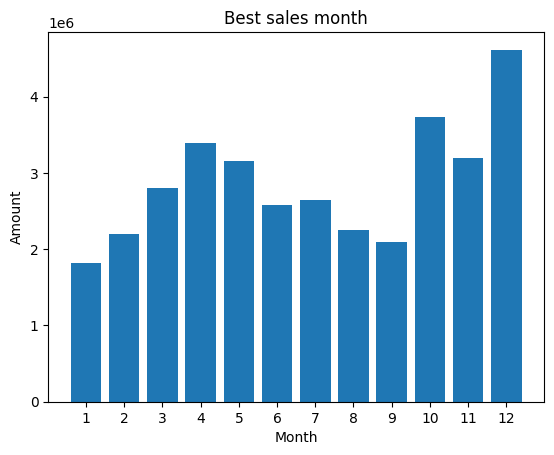

In [ ]:
months = range(1, 13)
plt.bar(months, best_month_sales['Sales'])
plt.xticks(months)
plt.title('Best sales month')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.show()

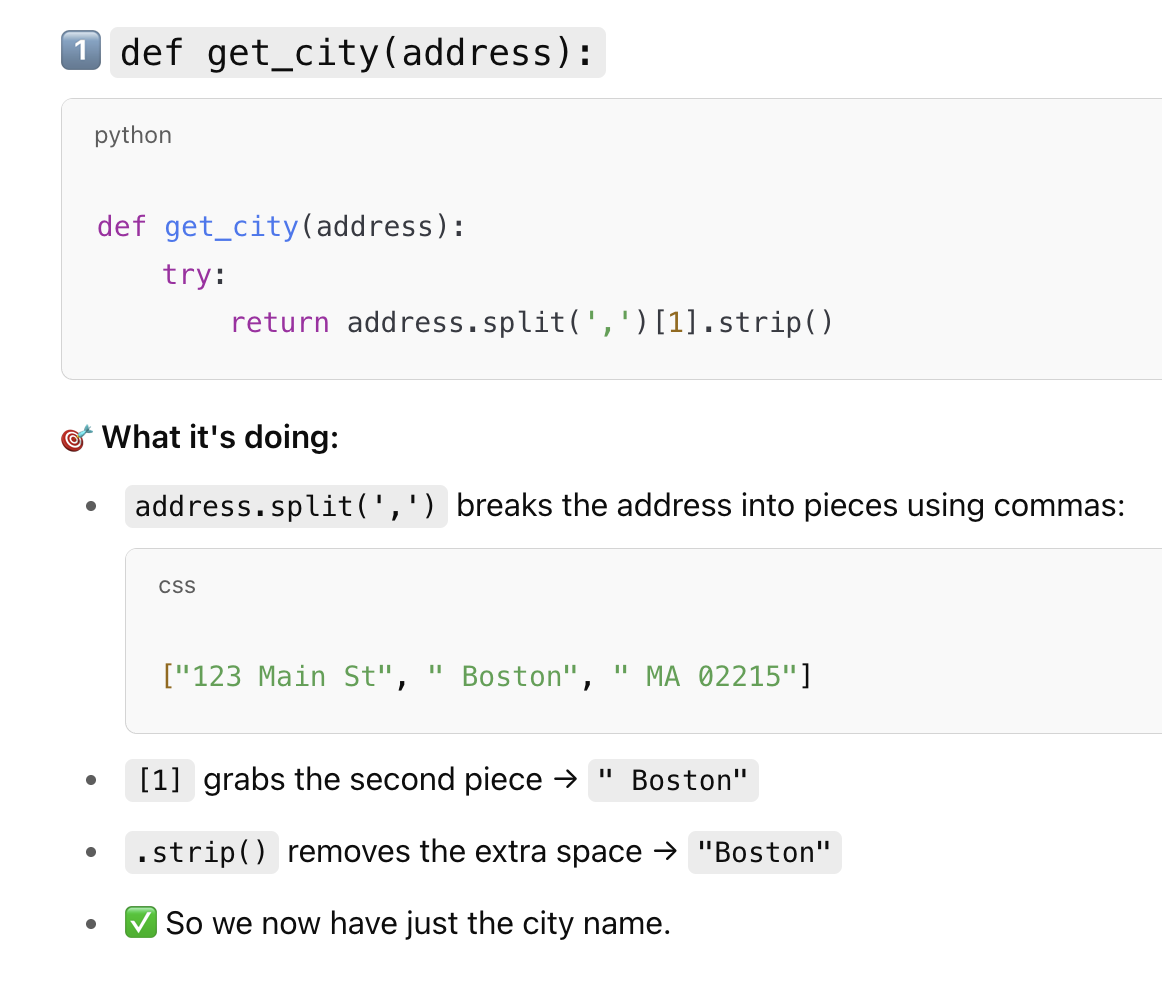

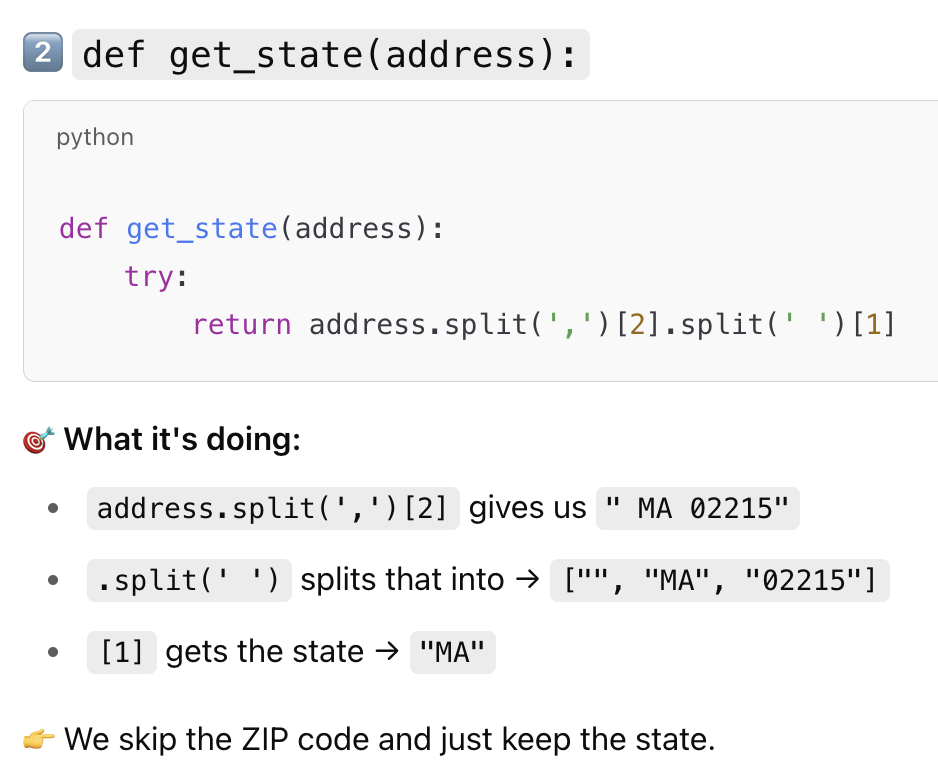

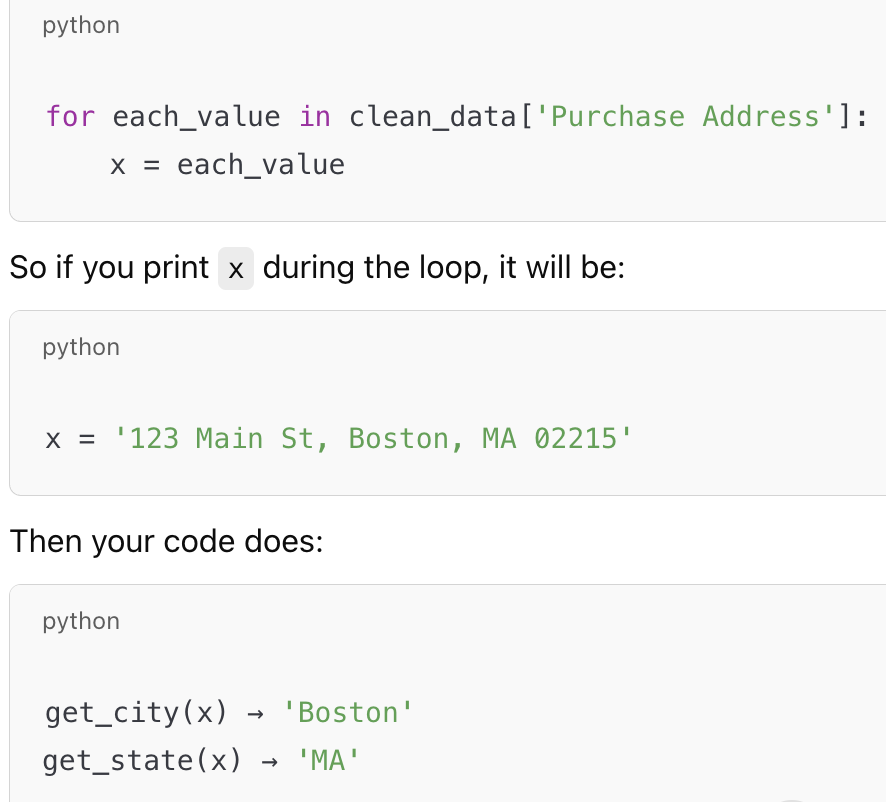

In [ ]:
# 2. which city had the highest number of sales


# the x value in lambda is a cell content. So for each cell we want to split it by commas and grab the first index (0 index = 185 Maple St)

def get_city(address):
  try:
    return address.split(',')[1].strip()
  except IndexError:
    return None

def get_state(address):
  try:
    return address.split(',')[2].split(' ')[1]  # [2] = MA 20150 / Split with spaces / [0] = get the first after split
  except IndexError:
    return None

clean_data['City'] = clean_data['Purchase Address'].apply(lambda x:f'{get_city(x)} ({get_state(x)})')
clean_data['City']


# str.split(',') = split with comma
# .str[1] = select the second element 'San Francisco'
# .str.strip() = removes the trailing whitespaces '  San Francisco  '

#clean_data['City'] = clean_data['Purchase Address'].str.split(',').str[1].str.strip()

,City
0,Boston (MA)
1,Portland (OR)
2,San Francisco (CA)
3,Los Angeles (CA)
4,Austin (TX)
...,...
186845,San Francisco (CA)
186846,Los Angeles (CA)
186847,Seattle (WA)
186848,Dallas (TX)


In [ ]:
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA)
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA)
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA)
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX)


In [ ]:
# 2. which city had the highest number of sales

highest_sales_city = clean_data.groupby('City')['Sales'].sum().reset_index()
highest_sales_city

,City,Sales
0,Atlanta (GA),2795498.58
1,Austin (TX),1819581.75
2,Boston (MA),3661642.01
3,Dallas (TX),2767975.40
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
6,Portland (ME),449758.27
7,Portland (OR),1870732.34
8,San Francisco (CA),8262203.91
9,Seattle (WA),2747755.48


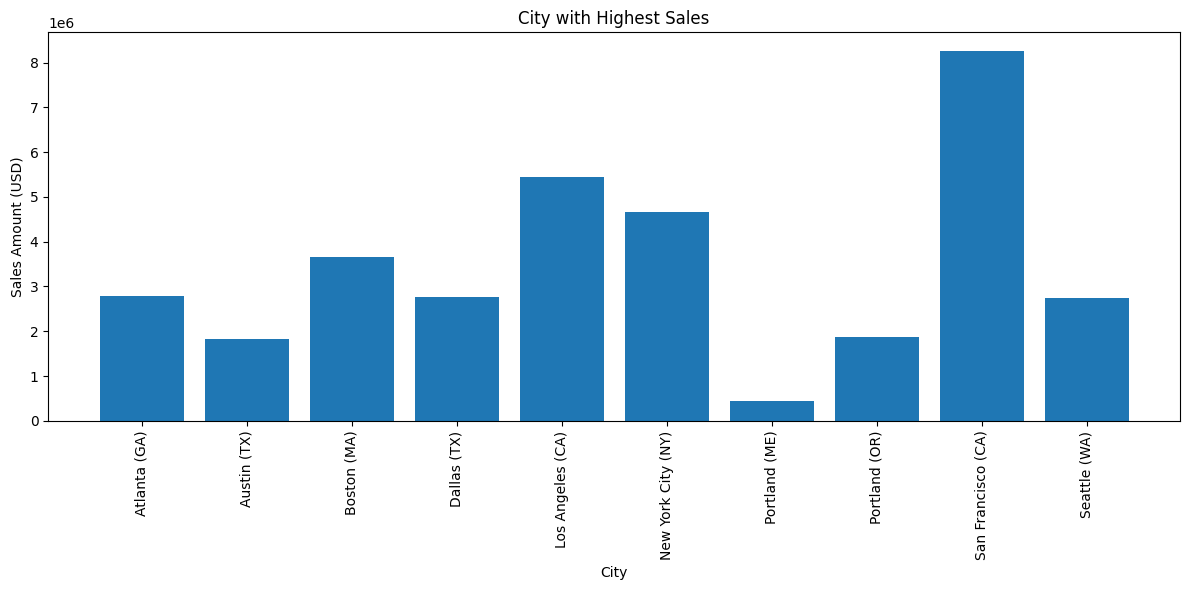

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(highest_sales_city['City'], highest_sales_city['Sales'])  # this ensures that the bar matches up correctly with the sales
plt.xticks(rotation=90)
plt.title('City with Highest Sales')
plt.ylabel('Sales Amount (USD)')
plt.xlabel('City')
plt.tight_layout()
plt.show()

In [ ]:
# 3. What time should we display advertisements to maximize likelyhood of customers buying product?

clean_data['Order Time'] = clean_data['Order Date'].dt.hour.astype('int32')
clean_data['Order Time']

,Order Time
0,21
1,14
2,13
3,20
4,11
...,...
186845,20
186846,12
186847,6
186848,10


In [ ]:
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA),20
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA),12
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA),6
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX),10


In [ ]:
best_sales_hour = clean_data.groupby('Order Time')['Quantity Ordered'].sum().reset_index()
best_sales_hour

,Order Time,Quantity Ordered
0,0,4428
1,1,2619
2,2,1398
3,3,928
4,4,937
5,5,1493
6,6,2810
7,7,4556
8,8,7002
9,9,9816


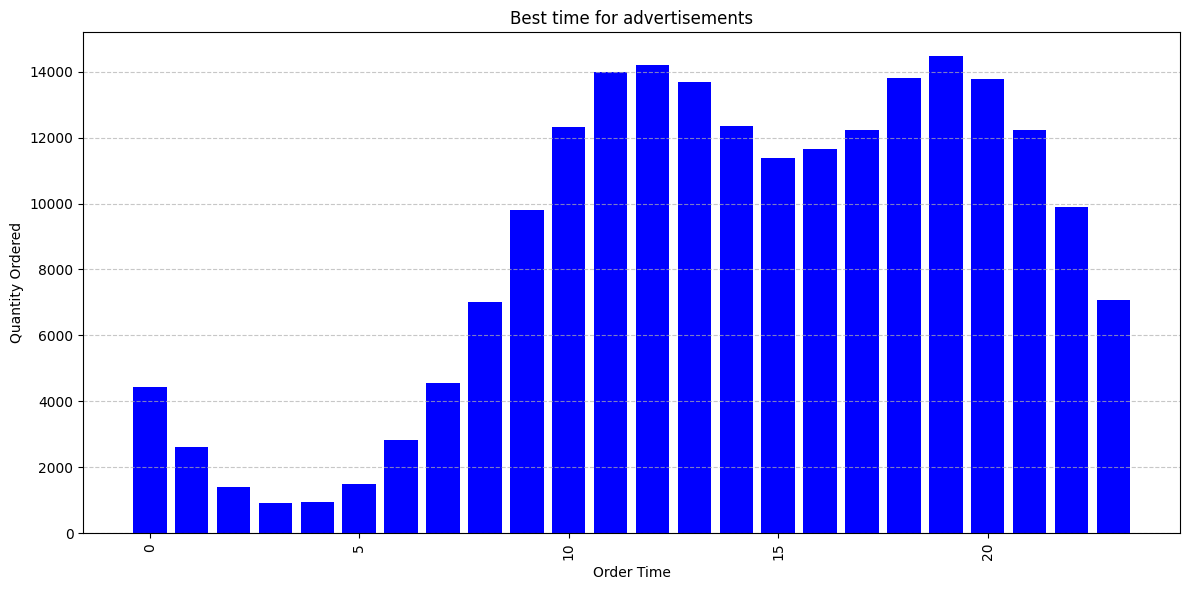

In [ ]:
def bar_plot(x, y, title='', x_label='', y_label='', color= 'blue', rotation=90):
  plt.figure(figsize=(12,6))
  plt.bar(x, y, color = color)  # needs named arguements like color =
  plt.xticks(rotation = rotation)
  plt.title(title)
  plt.xlabel(x_label)  # only expects a string x_label = ''
  plt.ylabel(y_label)  #
  plt.tight_layout()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

bar_plot(best_sales_hour['Order Time'], best_sales_hour['Quantity Ordered'], title = 'Best time for advertisements',
         x_label = 'Order Time', y_label = 'Quantity Ordered')

In [ ]:
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA),20
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA),12
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA),6
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX),10


In [ ]:
# 4.what products are most oftern sold together

duplicate_order = clean_data[clean_data['Order ID'].duplicated(keep=False)]
duplicate_order

# clean_data['Order ID'].duplicated() = tells you which are the duplicates
# clean_data[...] = tells you the rows which are duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City (NY),11
...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland (OR),0
186773,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City (NY),8
186774,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City (NY),8
186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin (TX),22


In [ ]:
grouped_items = duplicate_order.groupby('Order ID')['Product'].agg(','.join).reset_index(name='Grouped items')
grouped_items

,Order ID,Grouped items
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop,Wired Headphones"
7132,319556,"Google Phone,Wired Headphones"
7133,319584,"iPhone,Wired Headphones"
7134,319596,"iPhone,Lightning Charging Cable"


In [ ]:
clean_data_copy = clean_data.copy()

In [ ]:
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA),20
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA),12
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA),6
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX),10


In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
count = Counter()

for items in grouped_items['Grouped items']:        # looping through grouped items list
  product_list = items.split(',')                   # creating variable product_list and splitting the string into a list
  combos = combinations(sorted(product_list), 2)    # sort the list with two product combo ('Charging Cable', 'Headphones'), ('Charging Cable', 'iPhone')
  count.update(combos)                              # the update function in Counter class takes a list and loops through it, increase the count by 1

count.most_common(10)                               # most common is a function in common

[(('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Apple Airpods Headphones', 'iPhone'), 373),
 (('USB-C Charging Cable', 'Vareebadd Phone'), 368),
 (('Bose SoundSport Headphones', 'Google Phone'), 228),
 (('USB-C Charging Cable', 'Wired Headphones'), 205),
 (('Vareebadd Phone', 'Wired Headphones'), 149),
 (('Lightning Charging Cable', 'Wired Headphones'), 129)]

In [ ]:
clean_data.dtypes

,0
Order ID,int64
Product,object
Quantity Ordered,int64
Price Each,float64
Order Date,datetime64[ns]
Purchase Address,object
Month,int32
Sales,float64
City,object
Order Time,int32


In [ ]:
# 5. what product sold the most and why


most_sold_products = clean_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
most_sold_products

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


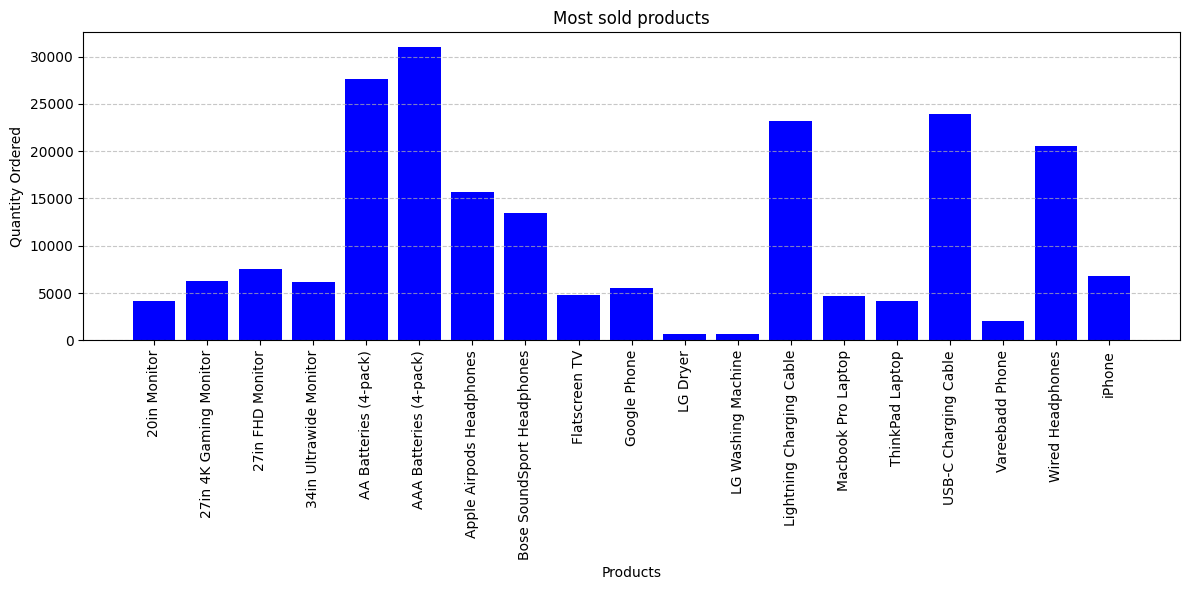

In [ ]:
bar_plot(most_sold_products['Product'], most_sold_products['Quantity Ordered'], title = 'Most sold products',
         x_label = 'Products', y_label = 'Quantity Ordered')

In [ ]:
avg_price_products = clean_data.groupby('Product')['Price Each'].mean().reset_index()
avg_price_products

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


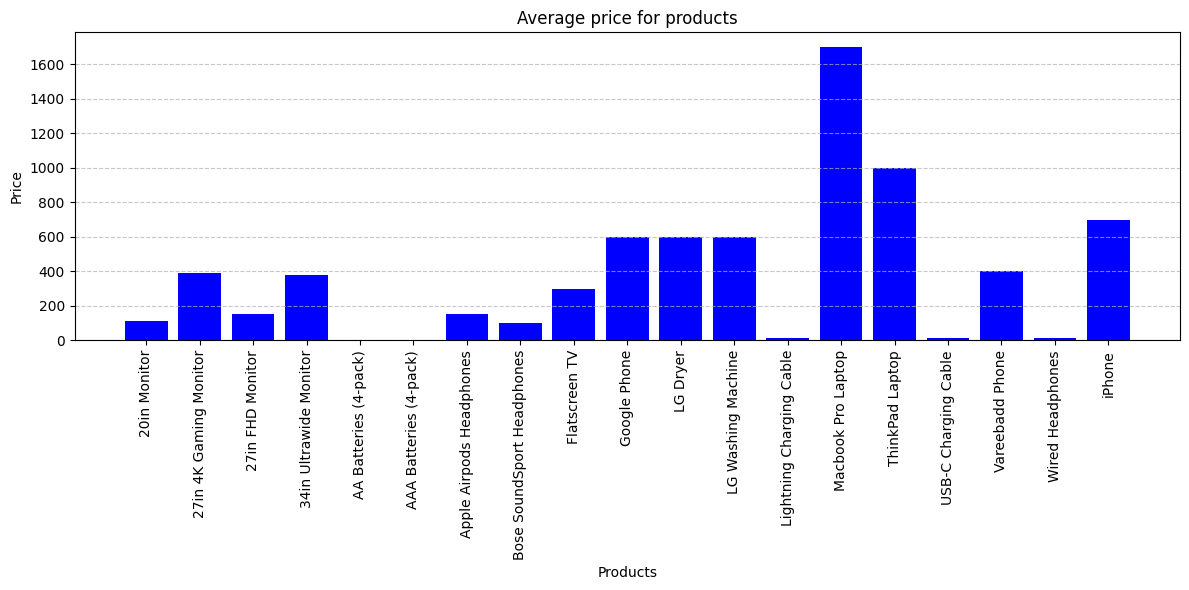

In [ ]:
bar_plot(avg_price_products['Product'], avg_price_products['Price Each'], title = 'Average price for products',
         x_label = 'Products', y_label = 'Price')

# chatGPT

In [ ]:
clean_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Order Time'],
      dtype='object')

In [ ]:
# 1. How many total sales transactions are in the dataset?

total_transctions = clean_data.groupby('Order ID').nunique()
total_transctions

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time
Order ID,,,,,,,,,
141234,1,1,1,1,1,1,1,1,1
141235,1,1,1,1,1,1,1,1,1
141236,1,1,1,1,1,1,1,1,1
141237,1,1,1,1,1,1,1,1,1
141238,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
319666,1,1,1,1,1,1,1,1,1
319667,1,1,1,1,1,1,1,1,1
319668,1,1,1,1,1,1,1,1,1


In [ ]:
# 2. What is the total revenue (sales) for the entire period?

total_sales_revenue = round(clean_data['Sales'].sum(), 2)
total_sales_revenue

np.float64(34492035.97)

In [ ]:
# 4. Which product generated the most revenue?

most_revenue_product = clean_data.groupby('Product')['Sales'].sum().reset_index()
most_revenue_product

,Product,Sales
0,20in Monitor,454148.71
1,27in 4K Gaming Monitor,2435097.56
2,27in FHD Monitor,1132424.50
3,34in Ultrawide Monitor,2355558.01
4,AA Batteries (4-pack),106118.40
5,AAA Batteries (4-pack),92740.83
6,Apple Airpods Headphones,2349150.00
7,Bose SoundSport Headphones,1345565.43
8,Flatscreen TV,1445700.00
9,Google Phone,3319200.00


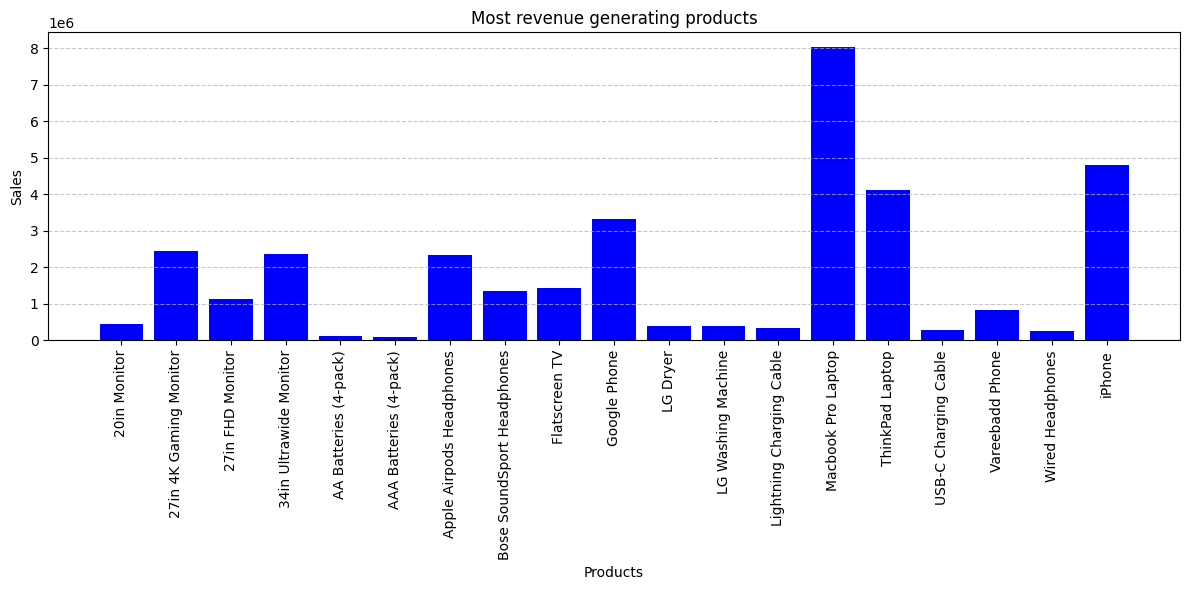

In [ ]:
bar_plot(most_revenue_product['Product'], most_revenue_product['Sales'], title = 'Most revenue generating products',
         x_label = 'Products', y_label = 'Sales')

In [ ]:
# 8. How many unique products were sold?

unique_products_count = clean_data['Product'].nunique()
unique_products_count

19

In [ ]:
# 9. What is the most common quantity ordered?

most_common_quantitiy = clean_data.groupby('Quantity Ordered')['Quantity Ordered'].sum()
most_common_quantitiy

,Quantity Ordered
Quantity Ordered,
1,168552
2,26648
3,8760
4,3224
5,1180
6,480
7,168
8,40
9,27


In [ ]:
# 10. Which day of the week had the highest sales?

clean_data['Day'] = clean_data['Order Date'].dt.day_name()
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time,Day
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,Tuesday
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,Monday
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,Thursday
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,Saturday
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,Friday
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA),20,Wednesday
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA),12,Sunday
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA),6,Monday
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX),10,Tuesday


In [ ]:
most_day_sales = clean_data.groupby('Day')['Sales'].sum().reset_index()
most_day_sales

,Day,Sales
0,Friday,4855938.38
1,Monday,4883326.72
2,Saturday,4904357.01
3,Sunday,4932169.66
4,Thursday,4839465.16
5,Tuesday,5087956.78
6,Wednesday,4988822.26


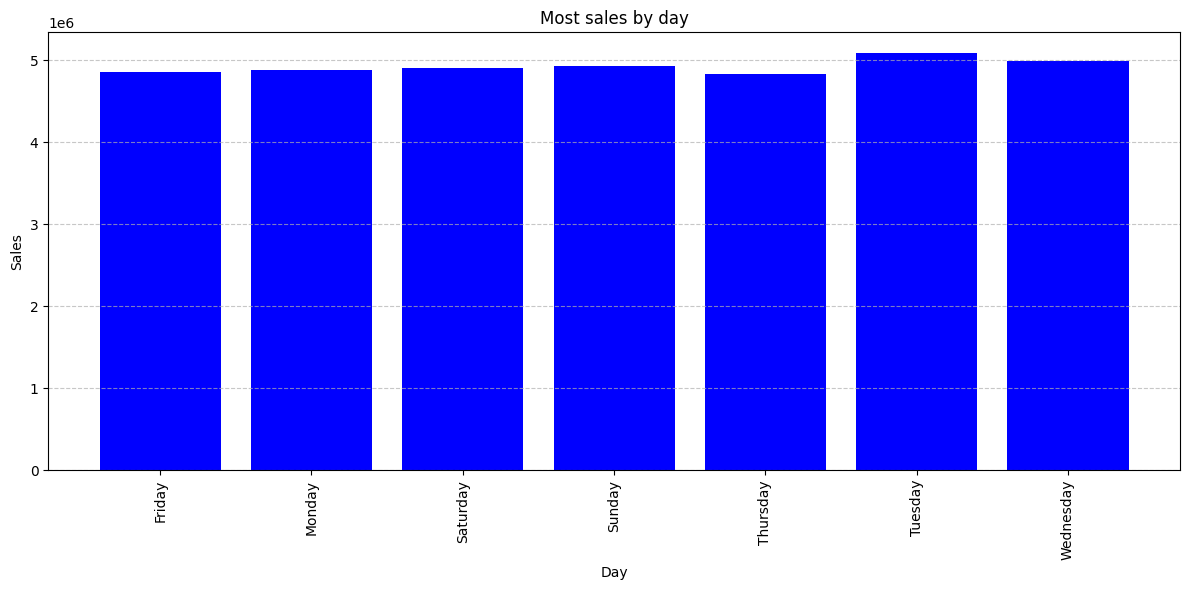

In [ ]:
bar_plot(most_day_sales['Day'], most_day_sales['Sales'], title = 'Most sales by day',
         x_label = 'Day', y_label = 'Sales')

In [ ]:
clean_data['Day'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Saturday', 'Friday', 'Wednesday',
       'Sunday'], dtype=object)

In [ ]:
month_quantity_sales = clean_data.groupby('Month')['Quantity Ordered'].sum().reset_index()
month_quantity_sales

,Month,Quantity Ordered
0,1,10903
1,2,13449
2,3,17005
3,4,20558
4,5,18667
5,6,15253
6,7,16072
7,8,13448
8,9,13109
9,10,22703


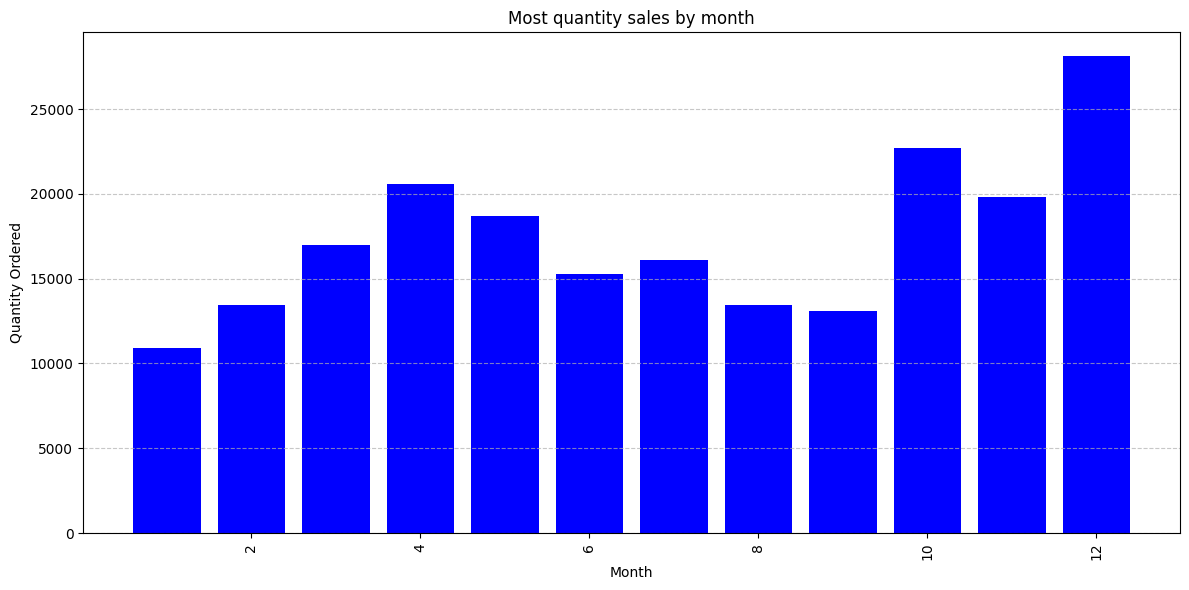

In [ ]:
bar_plot(month_quantity_sales['Month'], month_quantity_sales['Quantity Ordered'], title = 'Most quantity sales by month',
         x_label = 'Month', y_label = 'Quantity Ordered')

In [ ]:
# 12. How many orders included more than 1 quantity of a product?

